## Car MPG prediction Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('car-mpg.csv')

## Basic EDA

In [3]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
data.drop('car_name', axis=1, inplace=True)

In [5]:
data.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1
397,31.0,4,119.0,82,2720,19.4,82,1,1


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


In [7]:
data.shape

(398, 9)

In [8]:
data.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.nunique()

mpg         129
cyl           5
disp         82
hp           94
wt          351
acc          95
yr           13
origin        3
car_type      2
dtype: int64

In [11]:
df=data.copy()

In [12]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


## 1. Orgin - (1-america) , (2-europe) , (3-asia)

In [13]:
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [14]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,america,0
1,15.0,8,350.0,165,3693,11.5,70,america,0
2,18.0,8,318.0,150,3436,11.0,70,america,0
3,16.0,8,304.0,150,3433,12.0,70,america,0
4,17.0,8,302.0,140,3449,10.5,70,america,0


## 2. Encode orgin variable using one hot encoding (dummies)

In [15]:
df = pd.get_dummies(df, columns=['origin'], prefix = ['origin'],dtype=int)

In [16]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


## 3. Replace Special character "?" to NAN, Impute NAN with median value

In [17]:
temp=pd.DataFrame(data.hp.str.isdigit())
temp[temp['hp']==False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [18]:
df[df['hp']=='?']

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,1,0,0


In [19]:
df[df['hp'].str.contains('[^A-Za-z0-9 ]')]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,1,0,0


In [20]:
df['hp'] = df['hp'].replace('?', np.nan)

In [21]:
df.isnull().sum()

mpg               0
cyl               0
disp              0
hp                6
wt                0
acc               0
yr                0
car_type          0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [22]:
df['hp'] = pd.to_numeric(df['hp'])

In [23]:
df['hp'].fillna(df['hp'].median(), inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              398 non-null    float64
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   car_type        398 non-null    int64  
 8   origin_america  398 non-null    int32  
 9   origin_asia     398 non-null    int32  
 10  origin_europe   398 non-null    int32  
dtypes: float64(4), int32(3), int64(4)
memory usage: 29.7 KB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


In [26]:
df.isnull().sum()

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
car_type          0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

## UNIVARIATE ANALYSIS

In [27]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0


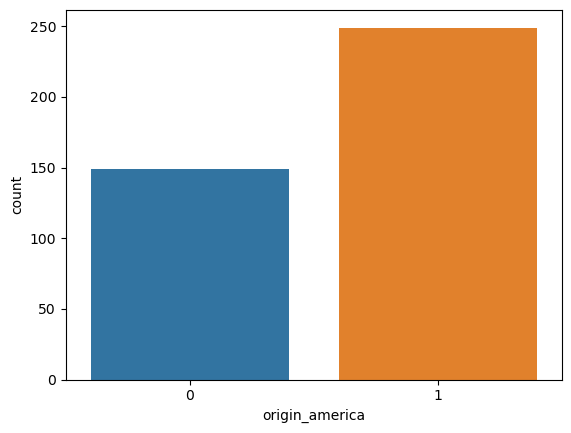

In [28]:
sns.countplot(x='origin_america', data=df)
plt.show()

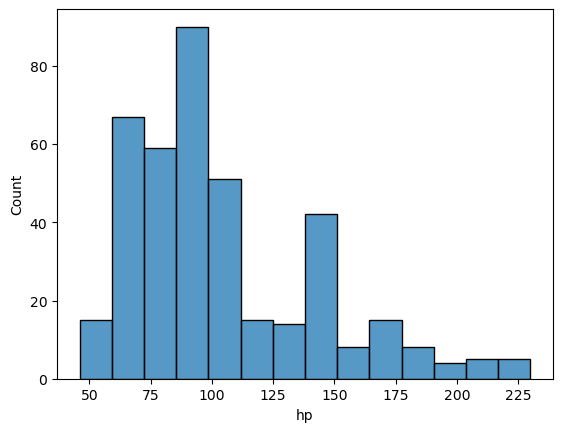

In [29]:
sns.histplot(x='hp', data=df)
plt.show()

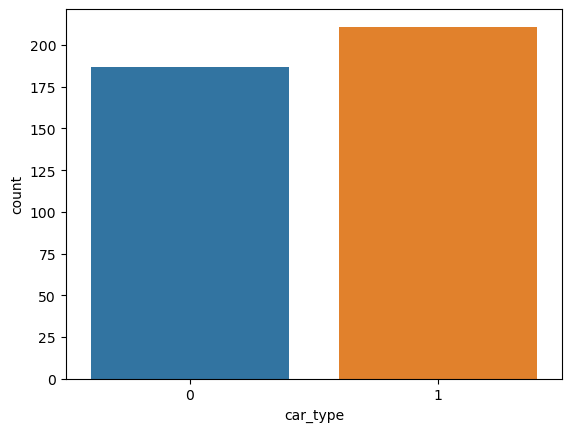

In [30]:
sns.countplot(x='car_type', data=df)
plt.show()

## BI-VARIATE 

In [31]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0


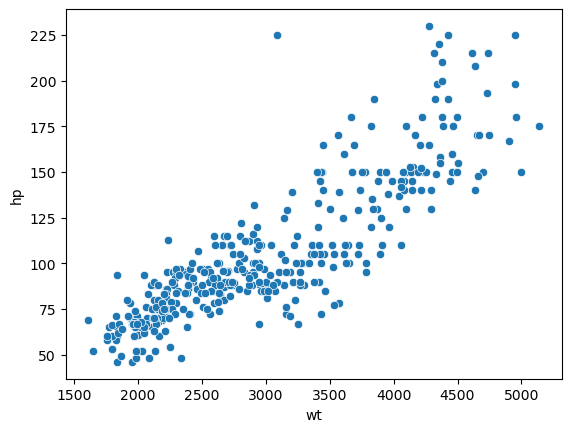

In [32]:
sns.scatterplot(x='wt',y='hp', data=df)
plt.show()

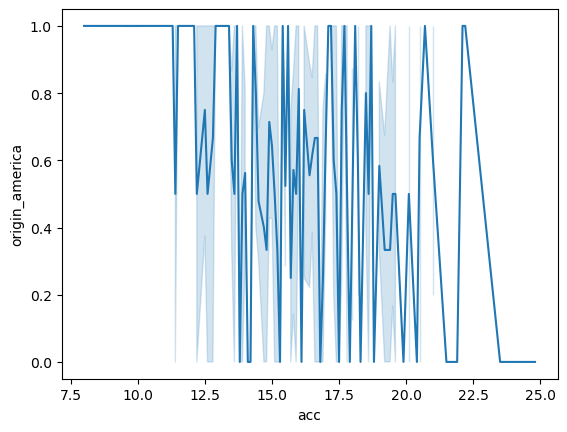

In [33]:
sns.lineplot(x='acc',y='origin_america',data=df)
plt.show()

## MULTI-VARIATE ANALYSIS

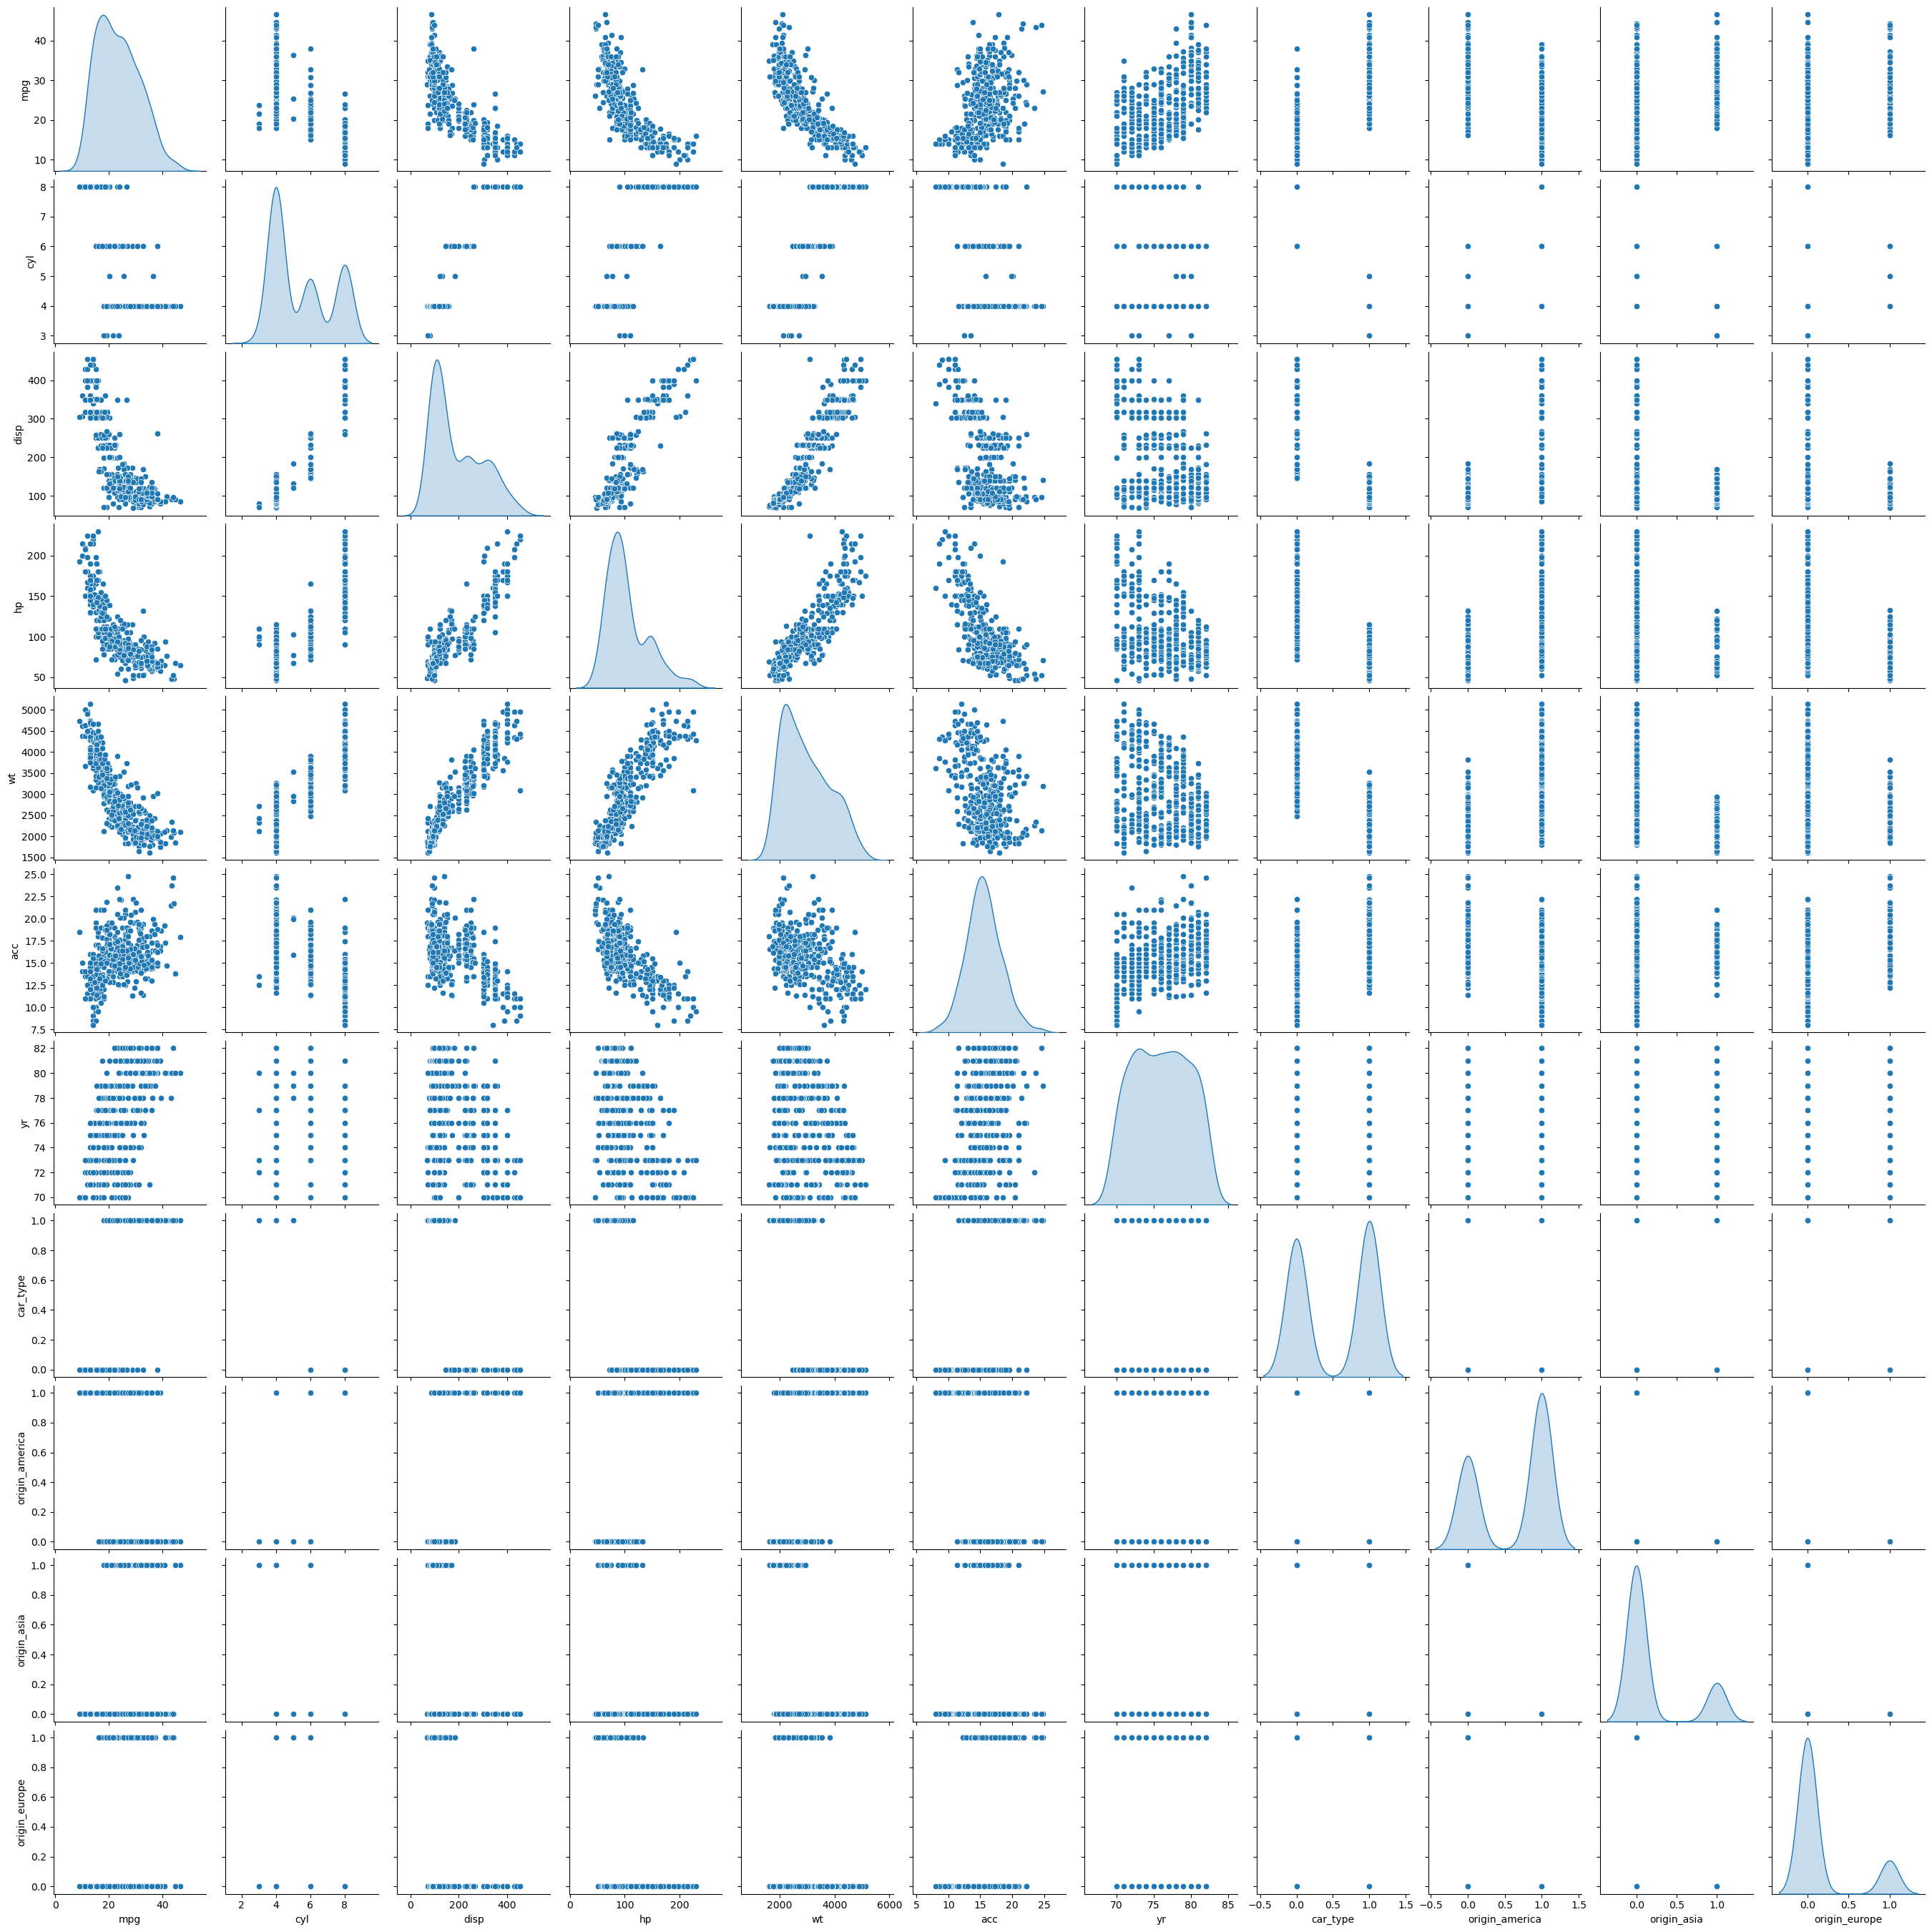

In [34]:
sns.pairplot(data=df,diag_kind="kde")
plt.savefig('PairPlot.png',dpi=300)
plt.show()

## Divide the dataset into 'X'-Indepentent Variable and 'Y'-Dependent Variable

In [35]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0


In [36]:
X=df.drop({'mpg','origin_america','origin_asia','origin_europe'},axis=1)
y = df[['mpg']]

In [37]:
X

,cyl,disp,hp,wt,acc,yr,car_type
0,8,307.0,130.0,3504,12.0,70,0
1,8,350.0,165.0,3693,11.5,70,0
2,8,318.0,150.0,3436,11.0,70,0
3,8,304.0,150.0,3433,12.0,70,0
4,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,1
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [38]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


## 4. Split the data into train and test data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [40]:
X_train.head()

,cyl,disp,hp,wt,acc,yr,car_type
65,8,351.0,153.0,4129,13.0,72,0
251,8,302.0,139.0,3570,12.8,78,0
238,4,98.0,83.0,2075,15.9,77,1
321,4,108.0,75.0,2265,15.2,80,1
70,8,400.0,190.0,4422,12.5,72,0


In [41]:
X_train.shape

(278, 7)

In [42]:
X_test.head()

,cyl,disp,hp,wt,acc,yr,car_type
358,4,120.0,74.0,2635,18.3,81,1
16,6,199.0,97.0,2774,15.5,70,0
292,8,360.0,150.0,3940,13.0,79,0
81,4,97.0,92.0,2288,17.0,72,1
112,4,122.0,85.0,2310,18.5,73,1


In [43]:
X_test.shape

(120, 7)

In [44]:
y_train.head()

,mpg
65,14.0
251,20.2
238,33.5
321,32.2
70,13.0


In [45]:
y_train.shape

(278, 1)

## Linear Regression - Gradient Method

In [46]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
for idx,col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,lr.coef_[0][idx]))

The coefficient for cyl is 1.3913590781783904
The coefficient for disp is 0.021051082447908733
The coefficient for hp is -0.05182809470681245
The coefficient for wt is -0.006290642558860627
The coefficient for acc is 0.05647699510235402
The coefficient for yr is 0.6933652534736072
The coefficient for car_type is 6.5373537091524785


In [54]:
c=lr.intercept_[0]
c

-21.2012307750003

## Model Performance measure (r2)

In [55]:
lr.score(X_train,y_train)

0.8319643155749583

In [56]:
lr.score(X_test,y_test)

0.8174484040240928

* Model Performance:
* R2(train) - 0.83
* R2 (test) - 0.81

* The model was able to perform good in both train and test data. Hence, the model seems to good fit model

## Prediction on Train and Test Data

In [57]:
y_test_pred=lr.predict(X_test)
y_test_pred

array([[30.21268153],
       [18.26948262],
       [20.4587416 ],
       [24.66474652],
       [26.19350686],
       [29.76063115],
       [22.53421254],
       [21.64948522],
       [15.45390849],
       [30.0943493 ],
       [26.79158503],
       [16.31918061],
       [18.25434262],
       [16.34430781],
       [21.9159177 ],
       [18.51043893],
       [16.26865904],
       [27.27774631],
       [33.87218928],
       [33.07091834],
       [18.66706323],
       [27.89611856],
       [17.98093982],
       [13.24891654],
       [18.88088932],
       [25.86377349],
       [19.97302832],
       [27.66937931],
       [16.35501344],
       [19.39666175],
       [28.9704941 ],
       [15.08129134],
       [29.99779102],
       [31.83792459],
       [23.37722838],
       [28.77224335],
       [23.94646722],
       [34.68880773],
       [20.80815476],
       [32.34505017],
       [24.36072187],
       [26.02646121],
       [22.34631622],
       [30.480948  ],
       [30.89828036],
       [10

In [58]:
y_train_pred=lr.predict(X_train)
y_train_pred

array([[14.07130936],
       [21.43076496],
       [29.8968589 ],
       [31.36733426],
       [11.31377613],
       [24.67524377],
       [10.54786119],
       [30.00733635],
       [12.0915223 ],
       [28.43384909],
       [34.72625238],
       [11.62843091],
       [14.64506596],
       [24.65288572],
       [26.50141993],
       [31.16807545],
       [26.3162933 ],
       [19.11869498],
       [ 7.37143394],
       [16.4632855 ],
       [18.70468825],
       [30.27418417],
       [22.11768361],
       [30.83089959],
       [23.27482324],
       [26.73022009],
       [27.37222799],
       [31.165894  ],
       [21.28195849],
       [ 9.73905544],
       [28.12948697],
       [32.95389609],
       [16.76173839],
       [19.92846537],
       [33.80888799],
       [26.57579619],
       [20.70038896],
       [28.38014895],
       [16.17247249],
       [21.64936838],
       [22.42088203],
       [21.20242037],
       [27.7251482 ],
       [13.52260257],
       [24.33805743],
       [28

In [59]:
r_square_train=r2_score(y_train,y_train_pred)
r_square_train

0.8319643155749583

In [60]:
r_square_test=r2_score(y_test,y_test_pred)
r_square_test

0.8174484040240928

* Model Performance:
* R2(train) - 0.83
* R2 (test) - 0.81

* The model was able to perform good in both train and test data. Hence, the model seems to good fit model